## TASK 1 - Prediction using Supervised ML
### Problem Statement: Predict the percentage of a student based on the number of study hours.
### Author: Mohammed Misran

### Load the given dataset

In [1]:
# Import the required libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
# Read the dataset
df = pd.read_csv("student_scores.csv")

# Print the shape of the df and its columns
print("Shape of df is", df.shape)
print("The columns are: ", df.columns.values)

Shape of df is (25, 2)
The columns are:  ['Hours' 'Scores']


### Brief analysis of the data

In [3]:
# Let's look at the first five rows of the df
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The first column represents the number of hours studied per day and the second column represents the percentage scores.

In [4]:
# Check for null values
df.isnull().any()

Hours     False
Scores    False
dtype: bool

There are no null values in the given data.

In [5]:
# Now let's look at a few statistics of the given data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


count - total number of values

mean - average value

std - standard deviation

min - minimum value

max - maximum value

To understand percentile, imagine the list of values is sorted in ascending order. The first value is the minimum and the last value is the maximum. If you go a quarter way through the list, you'll find a value that is bigger than 25% of the values. That is the 25th percentile value. The 50th percentile and 75th percentile values are defined analogously.


In [6]:
# What are the scores of students who have studied for minimum hours/day?
print("Scores of students who have studied for minimum hours/day: ",
      df[df['Hours'] == df['Hours'].min()]['Scores'].values)

# What are the scores of students who have studied for maximum hours/day?
print("Scores of students who have studied for maximum hours/day: ",
      df[df['Hours'] == df['Hours'].max()]['Scores'].values)

# How many hours/day have been used by students with the lowest score?
print("Hours/day studied by students with the lowest score: ",
      df[df['Scores'] == df['Scores'].min()]['Hours'].values)

# How many hours/day have been used by students with the highest score?
print("Hours/day studied by students with the highest score: ",
      df[df['Scores'] == df['Scores'].max()]['Hours'].values)

Scores of students who have studied for minimum hours/day:  [17]
Scores of students who have studied for maximum hours/day:  [88]
Hours/day studied by students with the lowest score:  [1.1]
Hours/day studied by students with the highest score:  [8.9]


### Plot to show the distribution of data

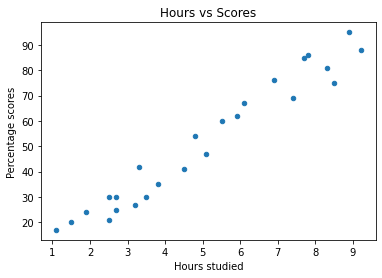

In [7]:
df.plot('Hours', 'Scores', kind='scatter')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()

### Prepare training data

In [8]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 1].values.reshape(-1, 1)
print("Shape of X is", X.shape)
print("Shape of Y is", Y.shape)

Shape of X is (25, 1)
Shape of Y is (25, 1)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape)

Shape of X_train is (17, 1)
Shape of X_test is (8, 1)


### Fit linear regression model

In [10]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Print the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[9.78856669]]
Intercept:  [2.37081538]


### Make predictions

In [11]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [12]:
# Mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(Y_test, Y_pred))

# Coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(Y_test, Y_pred))

Mean squared error: 22.97
Coefficient of determination: 0.96


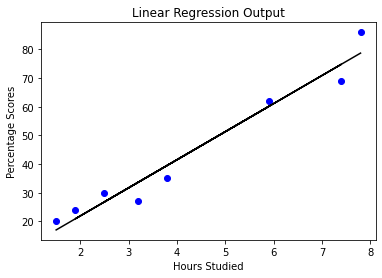

In [13]:
# Plot outputs
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='black')
plt.title('Linear Regression Output')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

In [14]:
# Make predictions using user defined input
hours = float(input("Enter the number of hours: "))
predicted_score = regr.predict([[hours]])
print("Predicted score is %.2f" % predicted_score[0][0])

Enter the number of hours: 9.25
Predicted score is 92.92
